Import libraries

In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score

In [2]:
import data_prep as dp

Import Data

In [3]:
dat_val, dat_tr = dp.load_train_split()

Path to dataset files: /Users/anabellafalk/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


### Prepare Data

In [4]:
# Initialize relevant columns
model_cols = ['category', 'amt', 'trans_month', 'trans_year']
identifier_cols = ['age_at_trans', 'city_pop', 'job_bin']
other_cols = ['distance']

#### Extract Date Info

In [5]:
# Create month column
dp.extract_month(dat_tr)
dp.extract_month(dat_val)

In [6]:
# Create year column
dp.extract_year(dat_tr)
dp.extract_year(dat_val)

In [7]:
# Create month and year column
dp.extract_month_year(dat_tr)
dp.extract_month_year(dat_val)

#### Extract Age

In [8]:
# Calculate and create age column
dp.extract_age(dat_tr)
dp.extract_age(dat_val)

#### Bin Jobs

In [9]:
# Fit binning on training data
job_binner = dp.fit_job_bins(dat_tr)

In [10]:
# Apply bins to training data
dp.bin_jobs(dat_tr, job_binner)
dp.bin_jobs(dat_val, job_binner)

#### Extract Distance

In [11]:
# Calculate and create distance column
dp.extract_distance(dat_tr)
dp.extract_distance(dat_val)

#### Scale Numeric Data

##### Scale Age

In [12]:
age_scaler = dp.fit_col_scaler(dat_tr, 'age_at_trans')
dp.scale_col(dat_tr, 'age_at_trans', age_scaler)
dp.scale_col(dat_val, 'age_at_trans', age_scaler)

##### Scale Distance

In [13]:
dist_scaler = dp.fit_col_scaler(dat_tr, 'distance')
dp.scale_col(dat_tr, 'distance', dist_scaler)
dp.scale_col(dat_val, 'distance', dist_scaler)

##### Scale City Population

In [14]:
city_pop_scaler = dp.fit_col_scaler(dat_tr, 'city_pop')
dp.scale_col(dat_tr, 'city_pop', city_pop_scaler)
dp.scale_col(dat_val, 'city_pop', city_pop_scaler)

##### Scale Transaction Amount

In [15]:
amt_scaler = dp.fit_col_scaler(dat_tr, 'amt')
dp.scale_col(dat_tr, 'amt', amt_scaler)
dp.scale_col(dat_val, 'amt', amt_scaler)

In [16]:
scale_cols = ['age_at_trans_scale', 'distance_scale', 'city_pop_scale', 'amt_scale']

#### Encode Categorical Data

##### Encode Category

In [17]:
category_encoder = dp.fit_col_encoder(dat_tr, 'category')
category_enc_tr = dp.encode_col(dat_tr, 'category', category_encoder)
category_enc_val = dp.encode_col(dat_val, 'category', category_encoder)
category_enc_tr

,category.entertainment,category.food_dining,category.gas_transport,category.grocery_net,category.grocery_pos,category.health_fitness,category.home,category.kids_pets,category.misc_net,category.misc_pos,category.personal_care,category.shopping_net,category.shopping_pos,category.travel
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319617,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319619,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### Encode Year

In [18]:
year_encoder = dp.fit_col_encoder(dat_tr, 'trans_year')
year_enc_tr = dp.encode_col(dat_tr, 'trans_year', year_encoder)
year_enc_val = dp.encode_col(dat_val, 'trans_year', year_encoder)
year_enc_tr

,trans_year.2019,trans_year.2020
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
319617,0.0,1.0
319618,0.0,1.0
319619,0.0,1.0
319620,0.0,1.0


##### Encode Month

In [19]:
dat_tr['trans_month'] = dat_tr['trans_month'].astype(str)
dat_val['trans_month'] = dat_val['trans_month'].astype(str)
dat_tr['trans_month']

1          1
4          1
13         1
14         1
20         1
          ..
1296647    6
1296652    6
1296661    6
1296667    6
1296672    6
Name: trans_month, Length: 319622, dtype: object

In [20]:
month_encoder = dp.fit_col_encoder(dat_tr, 'trans_month')
month_enc_tr = dp.encode_col(dat_tr, 'trans_month', month_encoder)
month_enc_val = dp.encode_col(dat_val, 'trans_month', month_encoder)
month_enc_tr

,trans_month.1,trans_month.10,trans_month.11,trans_month.12,trans_month.2,trans_month.3,trans_month.4,trans_month.5,trans_month.6,trans_month.7,trans_month.8,trans_month.9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
319617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
319618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
319619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
319620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##### Encode State

Decided not to use state due to imbalance of data and fear of overfitting

In [21]:
# state_encoder = dp.fit_col_encoder(dat_tr, 'state')
# state_enc_tr = dp.encode_col(dat_tr, 'state', state_encoder)
# state_enc_val = dp.encode_col(dat_val, 'state', dp.fit_col_encoder(dat_val, 'state'))
# state_enc_tr

##### Encode Job Bins

In [22]:
dat_tr['job_bin'] = dat_tr['job_bin'].astype(str)
dat_val['job_bin'] = dat_val['job_bin'].astype(str)
dat_tr['job_bin']

1          1
4          1
13         1
14         1
20         1
          ..
1296647    1
1296652    1
1296661    1
1296667    1
1296672    1
Name: job_bin, Length: 319622, dtype: object

In [23]:
job_bin_encoder = dp.fit_col_encoder(dat_tr, 'job_bin')
job_bin_enc_tr = dp.encode_col(dat_tr, 'job_bin', job_bin_encoder)
job_bin_enc_val = dp.encode_col(dat_val, 'job_bin', job_bin_encoder)
job_bin_enc_tr

,job_bin.0,job_bin.1,job_bin.2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
319617,0.0,1.0,0.0
319618,0.0,1.0,0.0
319619,0.0,1.0,0.0
319620,0.0,1.0,0.0


##### Encode Age Bins

In [24]:
age_bins = dp.fit_age_bins(dat_tr)
dp.bin_col(dat_val, 'age_at_trans', age_bins)

In [25]:
dat_tr['age_bin'] = dat_tr['age_bin'].astype(str)
dat_val['age_bin'] = dat_val['age_bin'].astype(str)

In [26]:
dat_val['age_at_trans'].unique()

array([30, 56, 52, 57, 25, 71, 77, 44, 28, 29, 53, 66, 80, 72, 38, 73, 47,
       54, 41, 48, 34, 20, 31, 46, 32, 65, 24, 42, 37, 82, 21, 63, 51, 35,
       40, 18, 64, 83, 43, 23, 61, 91, 90, 92, 67, 33, 60, 17, 89, 68, 55,
       70, 50, 45, 59, 19, 15, 49, 87, 26, 36, 79, 58, 84, 14, 81, 62, 76,
       27, 39, 69, 75, 78, 88, 86, 22, 85, 74, 94, 93, 16, 95])

In [27]:
dat_val['age_bin'].unique()

array(['(29.0, 34.0]', '(53.0, 64.0]', '(46.0, 53.0]', '(12.999, 29.0]',
       '(64.0, 94.0]', '(41.0, 46.0]', '(34.0, 41.0]'], dtype=object)

In [28]:
age_bin_encoder = dp.fit_col_encoder(dat_tr, 'age_bin')
age_bin_enc_tr = dp.encode_col(dat_tr, 'age_bin', age_bin_encoder)
age_bin_enc_val = dp.encode_col(dat_val, 'age_bin', age_bin_encoder)
age_bin_enc_tr

,"age_bin.(12.999, 29.0]","age_bin.(29.0, 34.0]","age_bin.(34.0, 41.0]","age_bin.(41.0, 46.0]","age_bin.(46.0, 53.0]","age_bin.(53.0, 64.0]","age_bin.(64.0, 94.0]"
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
319617,0.0,0.0,0.0,0.0,0.0,1.0,0.0
319618,1.0,0.0,0.0,0.0,0.0,0.0,0.0
319619,1.0,0.0,0.0,0.0,0.0,0.0,0.0
319620,1.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Encode Distance Bins

In [29]:
dist_bins = dp.fit_dist_bins(dat_tr)
dp.bin_col(dat_val, 'distance', dist_bins)

In [30]:
dat_tr['distance_bin'] = dat_tr['distance_bin'].astype(str)
dat_val['distance_bin'] = dat_val['distance_bin'].astype(str)

In [31]:
dat_val['distance_bin'].unique()

array(['(0.85, 0.95]', '(0.95, 1.06]', '(1.06, 1.41]', '(-0.0085, 0.43]',
       '(0.6, 0.74]', '(0.43, 0.6]', '(0.74, 0.85]'], dtype=object)

In [32]:
dist_bin_encoder = dp.fit_col_encoder(dat_tr, 'distance_bin')
dist_bin_enc_tr = dp.encode_col(dat_tr, 'distance_bin', dist_bin_encoder)
dist_bin_enc_val = dp.encode_col(dat_val, 'distance_bin', dist_bin_encoder)
dist_bin_enc_tr

,"distance_bin.(-0.0085, 0.43]","distance_bin.(0.43, 0.6]","distance_bin.(0.6, 0.74]","distance_bin.(0.74, 0.85]","distance_bin.(0.85, 0.95]","distance_bin.(0.95, 1.06]","distance_bin.(1.06, 1.41]"
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
319617,0.0,1.0,0.0,0.0,0.0,0.0,0.0
319618,1.0,0.0,0.0,0.0,0.0,0.0,0.0
319619,1.0,0.0,0.0,0.0,0.0,0.0,0.0
319620,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##### Encode city_pop Bins

In [33]:
city_pop_bins = dp.fit_city_pop_bins(dat_tr)
dp.bin_col(dat_val, 'city_pop', city_pop_bins)

In [34]:
dat_tr['city_pop_bin'].unique()

[(48.999, 513.0], (513.0, 1324.0], (21437.0, 1526206.0], (1324.0, 3289.0], (3289.0, 21437.0]]
Categories (5, interval[float64, right]): [(48.999, 513.0] < (513.0, 1324.0] < (1324.0, 3289.0] < (3289.0, 21437.0] < (21437.0, 1526206.0]]

In [35]:
dat_tr['city_pop_bin'] = dat_tr['city_pop_bin'].astype(str)
dat_val['city_pop_bin'] = dat_val['city_pop_bin'].astype(str)

In [41]:
dat_val['city_pop_bin'].unique()

array(['(3289.0, 21437.0]', '(1324.0, 3289.0]', '(21437.0, 1526206.0]',
       '(513.0, 1324.0]', '(48.999, 513.0]'], dtype=object)

In [42]:
city_pop_bin_encoder = dp.fit_col_encoder(dat_tr, 'city_pop_bin')
city_pop_bin_enc_tr = dp.encode_col(dat_tr, 'city_pop_bin', city_pop_bin_encoder)
city_pop_bin_enc_val = dp.encode_col(dat_val, 'city_pop_bin', city_pop_bin_encoder)
city_pop_bin_enc_tr

,"city_pop_bin.(1324.0, 3289.0]","city_pop_bin.(21437.0, 1526206.0]","city_pop_bin.(3289.0, 21437.0]","city_pop_bin.(48.999, 513.0]","city_pop_bin.(513.0, 1324.0]"
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
319617,0.0,0.0,0.0,1.0,0.0
319618,0.0,0.0,0.0,1.0,0.0
319619,1.0,0.0,0.0,0.0,0.0
319620,0.0,1.0,0.0,0.0,0.0


### Fit Models

#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

##### Full Model

In [29]:
rfc = RandomForestClassifier()

In [30]:
rfc_model_dat = pd.concat([
    dat_tr[['is_fraud'] + ['amt'] + identifier_cols[:2] + other_cols].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
    job_bin_enc_tr.reset_index(drop=True)
], axis=1)

In [31]:
rfc.fit(rfc_model_dat.drop('is_fraud', axis=1), rfc_model_dat['is_fraud'])

RandomForestClassifier()

In [32]:
rfc.score(rfc_model_dat.drop('is_fraud', axis=1), rfc_model_dat['is_fraud'])

1.0

In [90]:
roc_auc_score(rfc_model_dat['is_fraud'], rfc.predict_proba(rfc_model_dat.drop('is_fraud', axis=1))[:,1])

1.0

In [33]:
identifier_cols

['age_at_trans', 'city_pop', 'job_bin']

In [36]:
rfc_val_dat = pd.concat([
    dat_val[['is_fraud'] + ['amt'] + identifier_cols[:2] + other_cols].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
    job_bin_enc_val.reset_index(drop=True)
], axis=1)

In [37]:
rfc.score(rfc_val_dat.drop('is_fraud', axis=1), rfc_val_dat['is_fraud'])

0.9967893246323383

In [91]:
roc_auc_score(rfc_val_dat['is_fraud'], rfc.predict_proba(rfc_val_dat.drop('is_fraud', axis=1))[:,1])

0.9570423758111738

##### Check Feature Importance (SHAP)

Generate SHAP Values

In [ ]:
import shap
# explainer = shap.Explainer(rfc, rfc_model_dat)
# shap_values = explainer(rfc_model_dat)

100%|===================| 639220/639244 [68:07<00:00]        

IndexError: list index out of range

Read saved SHAP values

In [ ]:
# shap_values = pd.read_csv("shape_values_1.csv")

In [ ]:
# shap_values

.values =
array([[[ 0.00000000e+00,  0.00000000e+00],
        [ 7.70166663e-03, -7.70166643e-03],
        [-2.64499994e-03,  2.64499995e-03],
        ...,
        [ 8.33333470e-05, -8.33333354e-05],
        [ 3.33333260e-04, -3.33333306e-04],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00],
        [-3.13833326e-03,  3.13833316e-03],
        [-3.13666659e-03,  3.13666660e-03],
        ...,
        [ 1.33333327e-04, -1.33333332e-04],
        [ 2.40333326e-03, -2.40333329e-03],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 5.71666657e-03, -5.71666651e-03],
        [ 6.11833323e-03, -6.11833318e-03],
        ...,
        [-2.33333185e-05,  2.33333278e-05],
        [-2.00000691e-05,  2.00000018e-05],
        [ 0.00000000e+00,  0.00000000e+00]],

       ...,

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 1.62049999e-02, -1.62049997e-02],
        [-2.74833328e-03,  2.74833329e-03],
        

Save SHAP values to csv

In [ ]:
feature_names = rfc_model_dat.columns.tolist()
feature_names

['is_fraud',
 'amt',
 'age_at_trans',
 'city_pop',
 'job_bin',
 'distance',
 'category.entertainment',
 'category.food_dining',
 'category.gas_transport',
 'category.grocery_net',
 'category.grocery_pos',
 'category.health_fitness',
 'category.home',
 'category.kids_pets',
 'category.misc_net',
 'category.misc_pos',
 'category.personal_care',
 'category.shopping_net',
 'category.shopping_pos',
 'category.travel',
 'trans_year.2019',
 'trans_year.2020']

In [ ]:
# shap_values[..., 0]

.values =
array([[ 0.00000000e+00,  7.70166663e-03, -2.64499994e-03, ...,
         8.33333470e-05,  3.33333260e-04,  0.00000000e+00],
       [ 0.00000000e+00, -3.13833326e-03, -3.13666659e-03, ...,
         1.33333327e-04,  2.40333326e-03,  0.00000000e+00],
       [ 0.00000000e+00,  5.71666657e-03,  6.11833323e-03, ...,
        -2.33333185e-05, -2.00000691e-05,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.62049999e-02, -2.74833328e-03, ...,
         1.50000006e-04, -3.75499993e-03,  0.00000000e+00],
       [ 0.00000000e+00, -1.16799996e-02, -5.32999988e-03, ...,
        -7.60499977e-03, -7.25833314e-03,  0.00000000e+00],
       [ 0.00000000e+00,  3.83899991e-02,  4.94499989e-03, ...,
         5.49999978e-04, -8.19166631e-03,  0.00000000e+00]])

.base_values =
array([0.922, 0.922, 0.922, ..., 0.922, 0.922, 0.922])

.data =
array([[  0.  , 107.23,  40.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.  ,  41.96,  32.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.  ,  96.29,  73. 

In [ ]:
# shap_values[..., 0].values.shape

(319622, 22)

In [ ]:
# pd.DataFrame(shap_values[..., 0].values, columns=feature_names).to_csv('shap_values_0.csv', index=False)

In [ ]:
# pd.DataFrame(shap_values[..., 1].values, columns=feature_names).to_csv('shap_values_1.csv', index=False)

In [ ]:
# shap_values.shape

(319622, 22, 2)

Analyze SHAP values

In [ ]:
# mean_shap_values = shap_values[..., 1].values.mean(axis=0)
# mean_shap_values

array([ 0.00000000e+00, -7.04322969e-04,  7.31133296e-05,  0.00000000e+00,
       -2.34137318e-04,  1.35251337e-03,  1.47610898e-03, -3.95112833e-03,
       -2.62500541e-05, -1.77950509e-04, -2.05908955e-04, -8.96575321e-04,
        3.25816529e-04,  1.04022998e-03,  1.28349771e-04, -2.15925439e-04,
       -5.59296081e-05, -1.23870970e-03,  1.57524442e-04,  5.30821047e-05,
        3.34564256e-04,  0.00000000e+00])

In [ ]:
# mean_shap_values_labeled = pd.Series(mean_shap_values)
# mean_shap_values_labeled.index = feature_names
# mean_shap_values_labeled

is_fraud                   0.000000
amt                       -0.000704
age_at_trans               0.000073
city_pop                   0.000000
job_bin                   -0.000234
distance                   0.001353
category.entertainment     0.001476
category.food_dining      -0.003951
category.gas_transport    -0.000026
category.grocery_net      -0.000178
category.grocery_pos      -0.000206
category.health_fitness   -0.000897
category.home              0.000326
category.kids_pets         0.001040
category.misc_net          0.000128
category.misc_pos         -0.000216
category.personal_care    -0.000056
category.shopping_net     -0.001239
category.shopping_pos      0.000158
category.travel            0.000053
trans_year.2019            0.000335
trans_year.2020            0.000000
dtype: float64

In [ ]:
# mean_shap_values_labeled.sort_values(ascending = False, key = lambda x: abs(x))

category.food_dining      -0.003951
category.entertainment     0.001476
distance                   0.001353
category.shopping_net     -0.001239
category.kids_pets         0.001040
category.health_fitness   -0.000897
amt                       -0.000704
trans_year.2019            0.000335
category.home              0.000326
job_bin                   -0.000234
category.misc_pos         -0.000216
category.grocery_pos      -0.000206
category.grocery_net      -0.000178
category.shopping_pos      0.000158
category.misc_net          0.000128
age_at_trans               0.000073
category.personal_care    -0.000056
category.travel            0.000053
category.gas_transport    -0.000026
is_fraud                   0.000000
city_pop                   0.000000
trans_year.2020            0.000000
dtype: float64

distance has a high SHAP value, indicating that it may be a more important feature in modeling than expected.

city_pop has a low SHAP value, indicating that it may not be an important feature in modeling. 
Others that are relatively low include age and job.

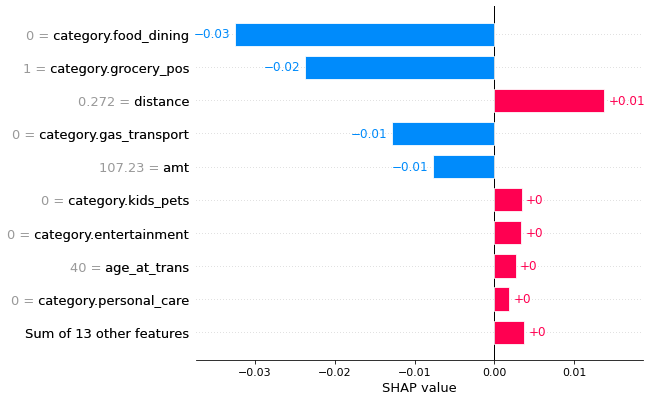

In [ ]:
# shap.plots.bar(shap_values[0,...,1])

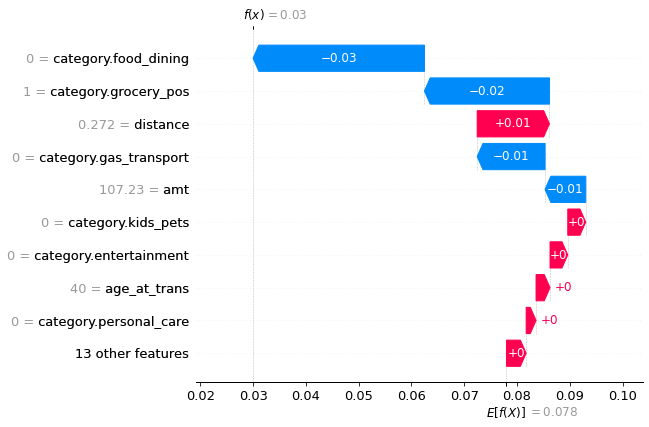

In [ ]:
# shap.plots.waterfall(shap_values[0,...,1])

#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

##### Full Model

In [58]:
full_log = LogisticRegression(penalty='none', max_iter = 500)

In [59]:
log_model_dat = pd.concat([
    dat_tr[['is_fraud'] + scale_cols].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
    job_bin_enc_tr.reset_index(drop=True)
], axis=1)

In [60]:
full_log.fit(log_model_dat.drop('is_fraud', axis=1), log_model_dat['is_fraud'])

LogisticRegression(max_iter=500, penalty='none')

In [61]:
full_log.score(log_model_dat.drop('is_fraud', axis=1), log_model_dat['is_fraud'])

0.9939334588983236

In [93]:
roc_auc_score(log_model_dat['is_fraud'], full_log.predict_proba(log_model_dat.drop('is_fraud', axis=1))[:,1])

0.8435893542871304

In [62]:
log_val_dat = pd.concat([
    dat_val[['is_fraud'] + scale_cols].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
    job_bin_enc_val.reset_index(drop=True)
], axis=1)

In [63]:
full_log.score(log_val_dat.drop('is_fraud', axis=1), log_val_dat['is_fraud'])

0.9940197717012281

In [92]:
roc_auc_score(log_val_dat['is_fraud'], full_log.predict_proba(log_val_dat.drop('is_fraud', axis=1))[:,1])

0.8579365906977554

Check Feature Importance using Coefficients

In [64]:
full_log.coef_

array([[ 8.16025204e-02,  5.55458422e-02, -1.96746485e-02,
         4.51955911e-01,  1.93491097e-01, -2.38291566e-01,
         8.45690290e-01,  3.39280463e-01,  1.70556530e+00,
        -3.77760679e-01, -4.56693833e-03,  2.94368078e-02,
         1.66304966e+00,  3.69135956e-01,  3.56128915e-01,
         1.57956499e+00,  6.24784976e-01, -7.63138056e+00,
        -3.03810488e-01, -2.42060791e-01,  2.31561470e-01,
         3.15165167e-02,  2.74780789e-02, -2.02145988e-01,
         3.78837438e-01,  6.69906852e-02, -4.69379834e-02,
         1.64724550e-01, -2.05639886e-01, -5.67969466e-01,
        -1.01325631e-01, -3.22961062e-01,  8.96671311e+00,
        -5.46243580e+00, -4.05014858e+00]])

In [65]:
full_feature_names = log_model_dat.columns.tolist()
full_feature_names

['is_fraud',
 'age_at_trans_scale',
 'distance_scale',
 'city_pop_scale',
 'amt_scale',
 'category.entertainment',
 'category.food_dining',
 'category.gas_transport',
 'category.grocery_net',
 'category.grocery_pos',
 'category.health_fitness',
 'category.home',
 'category.kids_pets',
 'category.misc_net',
 'category.misc_pos',
 'category.personal_care',
 'category.shopping_net',
 'category.shopping_pos',
 'category.travel',
 'trans_year.2019',
 'trans_year.2020',
 'trans_month.1',
 'trans_month.10',
 'trans_month.11',
 'trans_month.12',
 'trans_month.2',
 'trans_month.3',
 'trans_month.4',
 'trans_month.5',
 'trans_month.6',
 'trans_month.7',
 'trans_month.8',
 'trans_month.9',
 'job_bin.0',
 'job_bin.1',
 'job_bin.2']

In [69]:
full_coefs_labeled = pd.Series(full_log.coef_[0])
full_coefs_labeled.index = full_feature_names[1:]
full_coefs_labeled

age_at_trans_scale         0.081603
distance_scale             0.055546
city_pop_scale            -0.019675
amt_scale                  0.451956
category.entertainment     0.193491
category.food_dining      -0.238292
category.gas_transport     0.845690
category.grocery_net       0.339280
category.grocery_pos       1.705565
category.health_fitness   -0.377761
category.home             -0.004567
category.kids_pets         0.029437
category.misc_net          1.663050
category.misc_pos          0.369136
category.personal_care     0.356129
category.shopping_net      1.579565
category.shopping_pos      0.624785
category.travel           -7.631381
trans_year.2019           -0.303810
trans_year.2020           -0.242061
trans_month.1              0.231561
trans_month.10             0.031517
trans_month.11             0.027478
trans_month.12            -0.202146
trans_month.2              0.378837
trans_month.3              0.066991
trans_month.4             -0.046938
trans_month.5              0

In [ ]:
full_coefs_labeled = full_coefs_labeled.sort_values(ascending = False, key = lambda x: abs(x))
full_coefs_labeled

job_bin.0                  8.966713
category.travel           -7.631381
job_bin.1                 -5.462436
job_bin.2                 -4.050149
category.grocery_pos       1.705565
category.misc_net          1.663050
category.shopping_net      1.579565
category.gas_transport     0.845690
category.shopping_pos      0.624785
trans_month.7             -0.567969
amt_scale                  0.451956
trans_month.2              0.378837
category.health_fitness   -0.377761
category.misc_pos          0.369136
category.personal_care     0.356129
category.grocery_net       0.339280
trans_month.9             -0.322961
trans_year.2019           -0.303810
trans_year.2020           -0.242061
category.food_dining      -0.238292
trans_month.1              0.231561
trans_month.6             -0.205640
trans_month.12            -0.202146
category.entertainment     0.193491
trans_month.5              0.164725
trans_month.8             -0.101326
age_at_trans_scale         0.081603
trans_month.3              0

In [73]:
len(full_coefs_labeled)

35

In [75]:
full_coefs_labeled[10:]

amt_scale                  0.451956
trans_month.2              0.378837
category.health_fitness   -0.377761
category.misc_pos          0.369136
category.personal_care     0.356129
category.grocery_net       0.339280
trans_month.9             -0.322961
trans_year.2019           -0.303810
trans_year.2020           -0.242061
category.food_dining      -0.238292
trans_month.1              0.231561
trans_month.6             -0.205640
trans_month.12            -0.202146
category.entertainment     0.193491
trans_month.5              0.164725
trans_month.8             -0.101326
age_at_trans_scale         0.081603
trans_month.3              0.066991
distance_scale             0.055546
trans_month.4             -0.046938
trans_month.10             0.031517
category.kids_pets         0.029437
trans_month.11             0.027478
city_pop_scale            -0.019675
category.home             -0.004567
dtype: float64

city_pop still has a low contribution to the model with a low coefficient. Age and distance are also on the lower end.

job is much higher this time.

##### Base Model

In [ ]:
base_log = LogisticRegression(penalty='none', max_iter = 500)

In [76]:
scale_cols

['age_at_trans_scale', 'distance_scale', 'city_pop_scale', 'amt_scale']

In [77]:
log_base_model_dat = pd.concat([
    dat_tr[['is_fraud'] + ['amt_scale']].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
], axis=1)

In [ ]:
base_log.fit(log_base_model_dat.drop('is_fraud', axis=1), log_base_model_dat['is_fraud'])
base_log.score(log_base_model_dat.drop('is_fraud', axis=1), log_base_model_dat['is_fraud'])

0.99366126236617

In [ ]:
roc_auc_score(log_base_model_dat['is_fraud'], base_log.predict_proba(log_base_model_dat.drop('is_fraud', axis=1))[:,1])

0.8356667976131502

In [79]:
log_base_val_dat = pd.concat([
    dat_val[['is_fraud'] + ['amt_scale']].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
], axis=1)

In [80]:
base_log.score(log_base_val_dat.drop('is_fraud', axis=1), log_base_val_dat['is_fraud'])

0.9937117024357942

In [95]:
roc_auc_score(log_base_val_dat['is_fraud'], base_log.predict_proba(log_base_val_dat.drop('is_fraud', axis=1))[:,1])

0.8483951017745216

Check Feature Importance using coefficients

In [96]:
# Get coefs and assign feature names as index
base_coefs_labeled = pd.Series(base_log.coef_[0])

base_feature_names = log_base_model_dat.columns.tolist()
base_coefs_labeled.index = base_feature_names[1:]

# Sort coefs by absolute value
base_coefs_labeled = base_coefs_labeled.sort_values(ascending = False, key = lambda x: abs(x))
base_coefs_labeled

category.travel           -8.677426
trans_year.2019           -1.918436
trans_year.2020           -1.866376
category.grocery_pos       1.555298
category.misc_net          1.539183
category.shopping_net      1.417961
trans_month.7             -0.896123
category.gas_transport     0.724323
category.health_fitness   -0.563907
trans_month.6             -0.523929
trans_month.9             -0.497256
amt_scale                  0.478363
trans_month.8             -0.444815
category.shopping_pos      0.411941
category.food_dining      -0.387474
trans_month.12            -0.375332
trans_month.4             -0.264954
trans_month.10            -0.237488
trans_month.3             -0.228946
trans_month.11            -0.203738
category.personal_care     0.201641
category.home             -0.178576
category.misc_pos          0.156791
category.kids_pets        -0.137749
category.grocery_net       0.136614
trans_month.5             -0.133860
trans_month.2              0.094748
trans_month.1             -0

##### Model V1

Add job bins

In [98]:
log_v1 = LogisticRegression(penalty='none', max_iter = 500)

In [99]:
log_v1_model_dat = pd.concat([
    dat_tr[['is_fraud'] + ['amt_scale']].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
    job_bin_enc_tr.reset_index(drop=True)
], axis=1)

In [100]:
log_v1.fit(log_v1_model_dat.drop('is_fraud', axis=1), log_v1_model_dat['is_fraud'])
roc_auc_score(log_v1_model_dat['is_fraud'], log_v1.predict_proba(log_v1_model_dat.drop('is_fraud', axis=1))[:,1])

0.8451278963018721

In [101]:
log_v1_val_dat = pd.concat([
    dat_val[['is_fraud'] + ['amt_scale']].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
    job_bin_enc_val.reset_index(drop=True)
], axis=1)

In [102]:
roc_auc_score(log_v1_val_dat['is_fraud'], log_v1.predict_proba(log_v1_val_dat.drop('is_fraud', axis=1))[:,1])

0.8583565088186512

Job raises AUC-ROC

##### Model V2

Add age

In [103]:
log_v2 = LogisticRegression(penalty='none', max_iter = 500)

In [104]:
scale_cols

['age_at_trans_scale', 'distance_scale', 'city_pop_scale', 'amt_scale']

In [106]:
log_v2_model_dat = pd.concat([
    dat_tr[['is_fraud'] + scale_cols[:1] + scale_cols[3:]].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
    job_bin_enc_tr.reset_index(drop=True)
], axis=1)

In [108]:
log_v2.fit(log_v2_model_dat.drop('is_fraud', axis=1), log_v2_model_dat['is_fraud'])
roc_auc_score(log_v2_model_dat['is_fraud'], log_v2.predict_proba(log_v2_model_dat.drop('is_fraud', axis=1))[:,1])

0.8432609785069144

In [109]:
log_v2_val_dat = pd.concat([
    dat_val[['is_fraud'] + scale_cols[:1] + scale_cols[3:]].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
    job_bin_enc_val.reset_index(drop=True)
], axis=1)

In [111]:
roc_auc_score(log_v2_val_dat['is_fraud'], log_v2.predict_proba(log_v2_val_dat.drop('is_fraud', axis=1))[:,1])

0.8580833208223283

Age brings ROC-AUC slightly down but overall comparable.

##### Model V2.2

Add age but binned

In [31]:
log_v2_2 = LogisticRegression(penalty='none', max_iter = 500)

In [32]:
log_v2_2_model_dat = pd.concat([
    dat_tr[['is_fraud'] + ['amt_scale']].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
    job_bin_enc_tr.reset_index(drop=True),
    age_bin_enc_tr.reset_index(drop=True)
], axis=1)

In [34]:
log_v2_2.fit(log_v2_2_model_dat.drop('is_fraud', axis=1), log_v2_2_model_dat['is_fraud'])
roc_auc_score(log_v2_2_model_dat['is_fraud'], log_v2_2.predict_proba(log_v2_2_model_dat.drop('is_fraud', axis=1))[:,1])

0.8430384415571361

In [35]:
log_v2_2_val_dat = pd.concat([
    dat_val[['is_fraud'] + ['amt_scale']].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
    job_bin_enc_val.reset_index(drop=True),
    age_bin_enc_val.reset_index(drop=True)
], axis=1)

In [36]:
log_v2_2.fit(log_v2_2_val_dat.drop('is_fraud', axis=1), log_v2_2_val_dat['is_fraud'])
roc_auc_score(log_v2_2_val_dat['is_fraud'], log_v2_2.predict_proba(log_v2_2_val_dat.drop('is_fraud', axis=1))[:,1])

0.8565792180985474

Age scaled performs better than age binned

##### Model V3

Add distance to model v1

In [38]:
log_v3 = LogisticRegression(penalty='none', max_iter = 500)

In [37]:
log_v3_model_dat = pd.concat([
    dat_tr[['is_fraud'] + scale_cols[1:2] + scale_cols[3:]].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
    job_bin_enc_tr.reset_index(drop=True)
], axis=1)

In [39]:
log_v3.fit(log_v3_model_dat.drop('is_fraud', axis=1), log_v3_model_dat['is_fraud'])
roc_auc_score(log_v3_model_dat['is_fraud'], log_v3.predict_proba(log_v3_model_dat.drop('is_fraud', axis=1))[:,1])

0.8452662194996047

In [40]:
log_v3_val_dat = pd.concat([
    dat_val[['is_fraud'] + scale_cols[1:2] + scale_cols[3:]].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
    job_bin_enc_val.reset_index(drop=True)
], axis=1)

In [41]:
roc_auc_score(log_v3_val_dat['is_fraud'], log_v3.predict_proba(log_v3_val_dat.drop('is_fraud', axis=1))[:,1])

0.8580264392928105

Comparable to base model

##### Model V3.2

Add distance but binned

In [36]:
log_v3_2 = LogisticRegression(penalty='none', max_iter = 500)

In [38]:
log_v3_2_model_dat = pd.concat([
    dat_tr[['is_fraud'] + ['amt_scale']].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
    job_bin_enc_tr.reset_index(drop=True),
    dist_bin_enc_tr.reset_index(drop=True),
], axis=1)

In [39]:
log_v3_2.fit(log_v3_2_model_dat.drop('is_fraud', axis=1), log_v3_2_model_dat['is_fraud'])
roc_auc_score(log_v3_2_model_dat['is_fraud'], log_v3_2.predict_proba(log_v3_2_model_dat.drop('is_fraud', axis=1))[:,1])

0.8454403897042153

In [40]:
log_v3_2_val_dat = pd.concat([
    dat_val[['is_fraud'] + ['amt_scale']].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
    job_bin_enc_val.reset_index(drop=True),
    dist_bin_enc_val.reset_index(drop=True),
], axis=1)

In [42]:
roc_auc_score(log_v3_2_val_dat['is_fraud'], log_v3_2.predict_proba(log_v3_2_val_dat.drop('is_fraud', axis=1))[:,1])

0.8581212495947693

Binned comparable to distance scaled

##### Model V4

Add city_pop to model v1

In [42]:
log_v4 = LogisticRegression(penalty='none', max_iter = 500)

In [43]:
log_v4_model_dat = pd.concat([
    dat_tr[['is_fraud'] + scale_cols[2:]].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
    job_bin_enc_tr.reset_index(drop=True)
], axis=1)

In [44]:
log_v4.fit(log_v4_model_dat.drop('is_fraud', axis=1), log_v4_model_dat['is_fraud'])
roc_auc_score(log_v4_model_dat['is_fraud'], log_v4.predict_proba(log_v4_model_dat.drop('is_fraud', axis=1))[:,1])

0.845168915829817

In [46]:
log_v4_val_dat = pd.concat([
    dat_val[['is_fraud'] + scale_cols[2:]].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
    job_bin_enc_val.reset_index(drop=True)
], axis=1)

In [47]:
roc_auc_score(log_v4_val_dat['is_fraud'], log_v4.predict_proba(log_v4_val_dat.drop('is_fraud', axis=1))[:,1])

0.8585324058426992

Comparable to model v1

##### Model V4.2

Add city_pop but binned

In [46]:
log_v4_2 = LogisticRegression(penalty='none', max_iter = 500)

In [44]:
log_v4_2_model_dat = pd.concat([
    dat_tr[['is_fraud'] + ['amt_scale']].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
    job_bin_enc_tr.reset_index(drop=True),
    city_pop_bin_enc_tr.reset_index(drop=True)
], axis=1)

In [47]:
log_v4_2.fit(log_v4_2_model_dat.drop('is_fraud', axis=1), log_v4_2_model_dat['is_fraud'])
roc_auc_score(log_v4_2_model_dat['is_fraud'], log_v4_2.predict_proba(log_v4_2_model_dat.drop('is_fraud', axis=1))[:,1])

0.8451127318659162

In [48]:
log_v4_2_val_dat = pd.concat([
    dat_val[['is_fraud'] + ['amt_scale']].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
    job_bin_enc_val.reset_index(drop=True),
    city_pop_bin_enc_val.reset_index(drop=True)
], axis=1)

In [49]:
roc_auc_score(log_v4_2_val_dat['is_fraud'], log_v4_2.predict_proba(log_v4_2_val_dat.drop('is_fraud', axis=1))[:,1])

0.8578409104076578

Binned comparable to city_pop scaled

##### Lasso Regression

In [53]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter = 500)

In [54]:
lasso_model_dat = pd.concat([
    dat_tr[['is_fraud'] + scale_cols].reset_index(drop=True),
    category_enc_tr.reset_index(drop=True),
    year_enc_tr.reset_index(drop=True),
    month_enc_tr.reset_index(drop=True),
    job_bin_enc_tr.reset_index(drop=True)
], axis=1)

In [55]:
lasso.fit(lasso_model_dat.drop('is_fraud', axis=1), lasso_model_dat['is_fraud'])
roc_auc_score(lasso_model_dat['is_fraud'], lasso.predict_proba(lasso_model_dat.drop('is_fraud', axis=1))[:,1])

0.843551365141928

In [57]:
lasso_val_dat = pd.concat([
    dat_val[['is_fraud'] + scale_cols].reset_index(drop=True),
    category_enc_val.reset_index(drop=True),
    year_enc_val.reset_index(drop=True),
    month_enc_val.reset_index(drop=True),
    job_bin_enc_val.reset_index(drop=True)
], axis=1)

In [58]:
roc_auc_score(lasso_val_dat['is_fraud'], lasso.predict_proba(lasso_val_dat.drop('is_fraud', axis=1))[:,1])

0.8577418345907559

Check feature importance using coefficients

In [59]:
# Get coefs and assign feature names as index
lasso_coefs_labeled = pd.Series(lasso.coef_[0])

lasso_feature_names = lasso_model_dat.columns.tolist()
lasso_coefs_labeled.index = lasso_feature_names[1:]

# Sort coefs by absolute value
lasso_coefs_labeled = lasso_coefs_labeled.sort_values(ascending = False, key = lambda x: abs(x))
lasso_coefs_labeled

category.travel           -7.442394
job_bin.0                  6.232661
job_bin.1                 -2.174297
category.grocery_pos       1.343006
category.misc_net          1.300691
category.shopping_net      1.220405
job_bin.2                 -0.758421
category.health_fitness   -0.706682
trans_month.7             -0.580728
category.food_dining      -0.569069
category.gas_transport     0.479914
amt_scale                  0.448844
category.home             -0.350994
trans_month.2              0.345668
trans_month.9             -0.333556
category.kids_pets        -0.315981
category.shopping_pos      0.264764
trans_month.6             -0.226691
trans_month.12            -0.218030
trans_month.1              0.196602
category.entertainment    -0.151469
trans_month.5              0.132291
trans_month.8             -0.116762
age_at_trans_scale         0.081101
trans_month.4             -0.067059
trans_year.2019           -0.066289
distance_scale             0.055013
trans_month.3              0

In [60]:
lasso_coefs_labeled.values == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True])

In [61]:
lasso_coefs_labeled[-6:]

category.grocery_net      0.0
trans_month.11            0.0
trans_year.2020           0.0
category.personal_care    0.0
category.misc_pos         0.0
trans_month.10            0.0
dtype: float64

No full variables are brought to 0 only specific categories. Selected all features.

#### SVM

scale features, < 100, use kernel, balance classes

#### XGBoost